In [6]:
import numpy as np
import os, sys
current_dir = os.path.dirname(os.path.abspath(os.getcwd()))
sys.path.insert(0, current_dir)
sys.path.insert(0, os.path.join(current_dir, 'conv_gp/'))
from conv_gp.models import ModelBuilder
from argparse import Namespace
import observations

import gpflow

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import umap
sns.set(style="whitegrid", palette='deep')

from kernels import _sample_patches
matplotlib.rc('figure', dpi=150)
# matplotlib.rc('xtick', labelsize=16)
# matplotlib.rc('ytick', labelsize=16)
# matplotlib.rc('axes', titlesize=30)
# matplotlib.rc('axes', titlesize=30)
# matplotlib.rc('legend', fontsize=30)
# matplotlib.rc('axes', labelsize=30)

# font = {
#     'size': 32,
#     'family': 'sans-serif'
# }
# matplotlib.rc('font', **font)

In [7]:
import json
def read_json_file(filename):
    with open(filename, 'rt') as f:
        data = json.loads(f.read())
    return np.array(data) 

files = ['./data/cifar_fm1.json', './data/cifar_fm2.json', './data/cifar_fm5.json', './data/cifar_fm10.json', './data/cifar_fm16.json', './data/cifar_fm32.json']
runs = []
for file in files:
    runs.append(read_json_file(file))
feature_maps = np.array([1, 2, 5, 10, 16, 32])
runs = np.stack(runs)

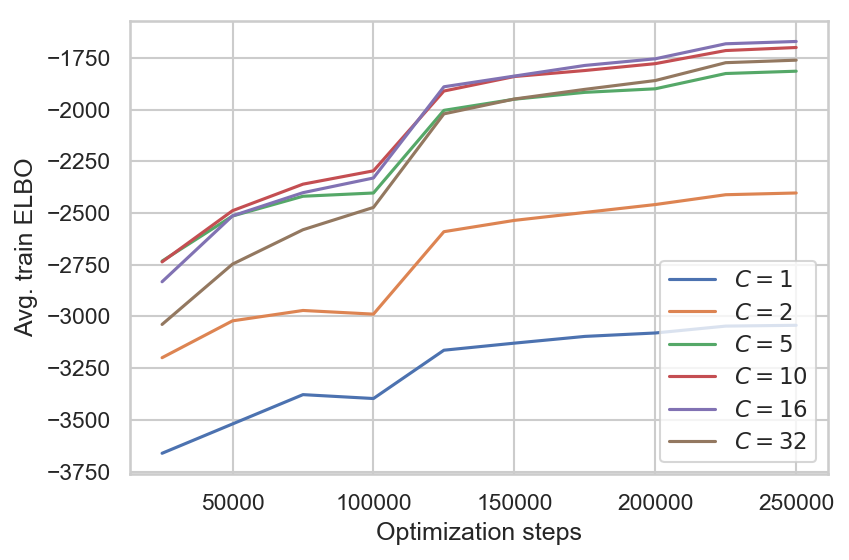

In [8]:
for i, feature_map in enumerate(feature_maps):
    data = runs[i]
    plt.plot(data[:, 1], data[:, 2], label='$C={}$'.format(feature_map))
    
plt.xlabel('Optimization steps')
plt.ylabel('Avg. train ELBO')
plt.legend();

In [4]:
import pandas
def read_csv(filename):
    filename = './data/' + filename + '/log.csv'
    frame = pandas.read_csv(filename)
    return frame.values 

files = ['cifar_fm1', 'cifar_fm2', 'cifar_fm5', 'cifar_fm10', 'cifar_fm16', 'cifar_fm32']
values = np.stack([read_csv(f) for f in files])

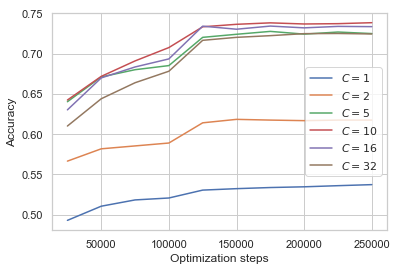

In [5]:
labels = ['entry', 'step', 'accuracy']

for i, fm in enumerate(feature_maps):
    data = values[i]
    plt.plot(data[:, 1], data[:, 2], label="$C={}$".format(fm))

plt.xlabel('Optimization steps')
plt.ylabel('Accuracy')
plt.legend();